<a href="https://colab.research.google.com/github/mlacasa/Probabilidad/blob/main/T_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo de Estudio
Se quiere investigar si un nuevo fármaco es efectivo para reducir los niveles de colesterol total en adultos con hipercolesterolemia. Para ello, se realizará un ensayo clínico aleatorizado en el que se compararán dos grupos:\

**Grupo de tratamiento**: 50 pacientes que recibirán el nuevo fármaco.\
**Grupo placebo**: 50 pacientes que recibirán un placebo inactivo.\


**Paso 1: Formular las Hipótesis**

**Hipótesis nula $H_o$**: El fármaco no reduce significativamente los niveles de colesterol en comparación con el placebo. Matemáticamente, esto se puede expresar como:  $\mu_tto - \mu_placebo = 0$.\
En otras palabras, el tratamiento no ha funcionado y no hay diferencias estadísticas entre tomar o no el tratamiento.\

**Hipótesis alternativa**: El fármaco reduce significativamente los niveles de colesterol en comparación con el placebo. Esto se expresa como:
(esto es una hipótesis unidireccional, ya que se espera que el tratamiento reduzca el colesterol).

**Paso 2: Recolección de Datos**
Se mide el nivel de colesterol total de cada paciente al inicio del estudio y después de 8 semanas de tratamiento. Digamos que los resultados obtenidos son:

Grupo de tratamiento: Media del colesterol = 180 mg/dL, Desviación estándar = 15 mg/dL.
Grupo placebo: Media del colesterol = 200 mg/dL, Desviación estándar = 20 mg/dL.

In [6]:
# Se recogen los datos
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

# Paso 1: Definir los datos específicos, se recogen 50 muestras de cada grupo.
tratamiento = np.array([178, 182, 179, 175, 180, 177, 181, 183, 176, 178,
                        179, 184, 180, 182, 175, 177, 178, 180, 176, 179,
                        178, 181, 183, 177, 180, 175, 179, 182, 181, 178,
                        176, 180, 179, 177, 183, 181, 175, 182, 180, 179,
                        174, 179, 181, 178, 180, 177, 182, 179, 181, 176])

placebo = np.array([201, 198, 202, 200, 205, 199, 203, 206, 197, 202,
                    204, 201, 200, 198, 203, 205, 206, 199, 202, 204,
                    198, 201, 200, 203, 199, 205, 204, 202, 201, 200,
                    203, 198, 196, 204, 202, 200, 205, 203, 199, 201,
                    200, 202, 205, 201, 203, 198, 200, 204, 202, 201])

In [7]:
# Creamos una tabla
data = {'Tratamiento': tratamiento, 'Placebo': placebo}
df = pd.DataFrame(data)
df.head()

,Tratamiento,Placebo
0,178,201
1,182,198
2,179,202
3,175,200
4,180,205


## ANÁLISIS DE LA NORMALIDAD DE LAS MUESTRAS

In [8]:
# prompt: Evaluar los test de kolmogorov smirnov y shapiro wilk para evaluar la normalidad de las 2 muestras

# Test de Kolmogorov-Smirnov
ks_statistic_tratamiento, ks_p_value_tratamiento = stats.kstest(tratamiento, 'norm')
ks_statistic_placebo, ks_p_value_placebo = stats.kstest(placebo, 'norm')

print(f"Test de Kolmogorov-Smirnov para el grupo de tratamiento:")
print(f"Estadístico KS: {ks_statistic_tratamiento:.4f}")
print(f"Valor p: {ks_p_value_tratamiento:.4f}")

print(f"\nTest de Kolmogorov-Smirnov para el grupo placebo:")
print(f"Estadístico KS: {ks_statistic_placebo:.4f}")
print(f"Valor p: {ks_p_value_placebo:.4f}")


# Test de Shapiro-Wilk
shapiro_statistic_tratamiento, shapiro_p_value_tratamiento = stats.shapiro(tratamiento)
shapiro_statistic_placebo, shapiro_p_value_placebo = stats.shapiro(placebo)

print(f"\nTest de Shapiro-Wilk para el grupo de tratamiento:")
print(f"Estadístico Shapiro-Wilk: {shapiro_statistic_tratamiento:.4f}")
print(f"Valor p: {shapiro_p_value_tratamiento:.4f}")

print(f"\nTest de Shapiro-Wilk para el grupo placebo:")
print(f"Estadístico Shapiro-Wilk: {shapiro_statistic_placebo:.4f}")
print(f"Valor p: {shapiro_p_value_placebo:.4f}")

Test de Kolmogorov-Smirnov para el grupo de tratamiento:
Estadístico KS: 1.0000
Valor p: 0.0000

Test de Kolmogorov-Smirnov para el grupo placebo:
Estadístico KS: 1.0000
Valor p: 0.0000

Test de Shapiro-Wilk para el grupo de tratamiento:
Estadístico Shapiro-Wilk: 0.9721
Valor p: 0.2823

Test de Shapiro-Wilk para el grupo placebo:
Estadístico Shapiro-Wilk: 0.9714
Valor p: 0.2644


## Cómo proceder cuando no coinciden tests K-S y Shapiro?

**1. Examina los Resultados**:\
Valor p: Revisa los valores p obtenidos de ambos tests. Un valor p menor a un nivel de significancia $ \alpha $, típicamente 0.05) indica que se rechaza la hipótesis nula de normalidad.

Estadística del test: Presta atención a las estadísticas de prueba. A veces, una prueba puede indicar no normalidad mientras que la otra no.

**2. Analiza Visualmente los Datos**;\
Gráficos: Utiliza histogramas, gráficos de densidad y gráficos Q-Q para visualizar la distribución de los datos. A menudo, la representación visual puede proporcionar información adicional sobre la normalidad.
Boxplots: Crea boxplots para detectar valores atípicos que podrían estar influyendo en los resultados de los tests.

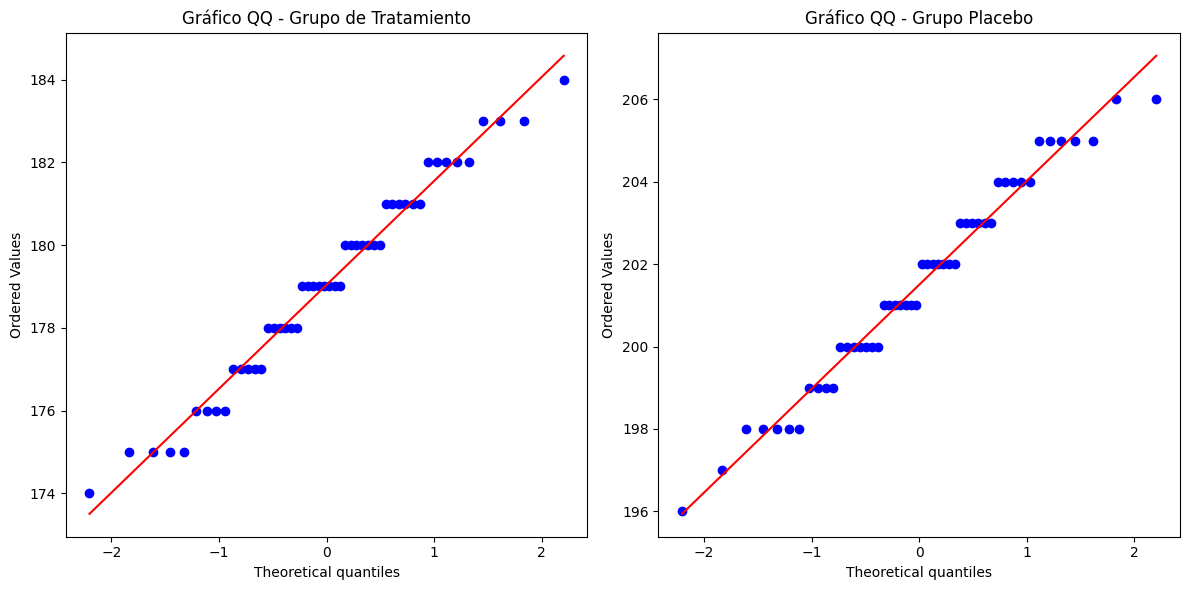

In [9]:
# prompt: muestra los gráficos QQ de ambos parámetros

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

# ... (previous code) ...

# Gráficos QQ
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
stats.probplot(tratamiento, dist="norm", plot=plt)
plt.title("Gráfico QQ - Grupo de Tratamiento")

plt.subplot(1, 2, 2)
stats.probplot(placebo, dist="norm", plot=plt)
plt.title("Gráfico QQ - Grupo Placebo")

plt.tight_layout()
plt.show()

Parece que los gráficos QQ dan soporte al supuesto de normalidad.

Veamos los histogramas

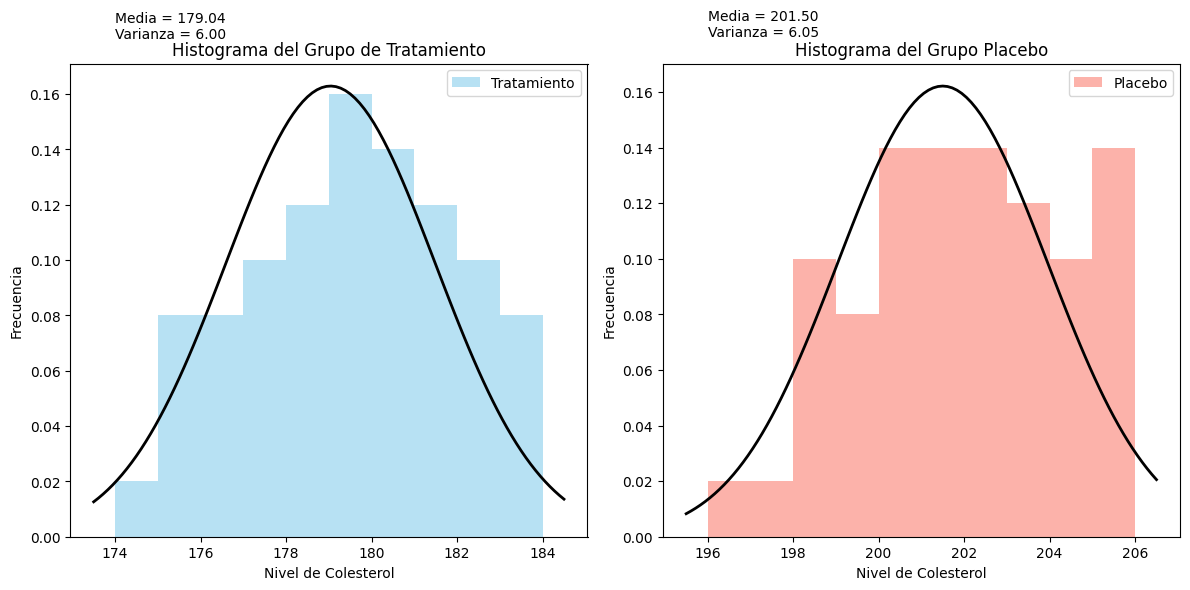

In [10]:
# prompt: Generar 2 histogramas de las 2 variables, que muestren la curva de la distribución normal, indica la media y varianza en el gráfico

# Calculate mean and variance for each group
mean_tratamiento = np.mean(tratamiento)
variance_tratamiento = np.var(tratamiento)
mean_placebo = np.mean(placebo)
variance_placebo = np.var(placebo)

# Create histograms with normal distribution curves
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(tratamiento, bins=10, density=True, alpha=0.6, color='skyblue', label='Tratamiento')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean_tratamiento, np.sqrt(variance_tratamiento))
plt.plot(x, p, 'k', linewidth=2)
plt.title('Histograma del Grupo de Tratamiento')
plt.xlabel('Nivel de Colesterol')
plt.ylabel('Frecuencia')
plt.text(174, 0.18, f'Media = {mean_tratamiento:.2f}\nVarianza = {variance_tratamiento:.2f}', fontsize=10)
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(placebo, bins=10, density=True, alpha=0.6, color='salmon', label='Placebo')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean_placebo, np.sqrt(variance_placebo))
plt.plot(x, p, 'k', linewidth=2)
plt.title('Histograma del Grupo Placebo')
plt.xlabel('Nivel de Colesterol')
plt.ylabel('Frecuencia')
plt.text(196, 0.18, f'Media = {mean_placebo:.2f}\nVarianza = {variance_placebo:.2f}', fontsize=10)
plt.legend()

plt.tight_layout()
plt.show()

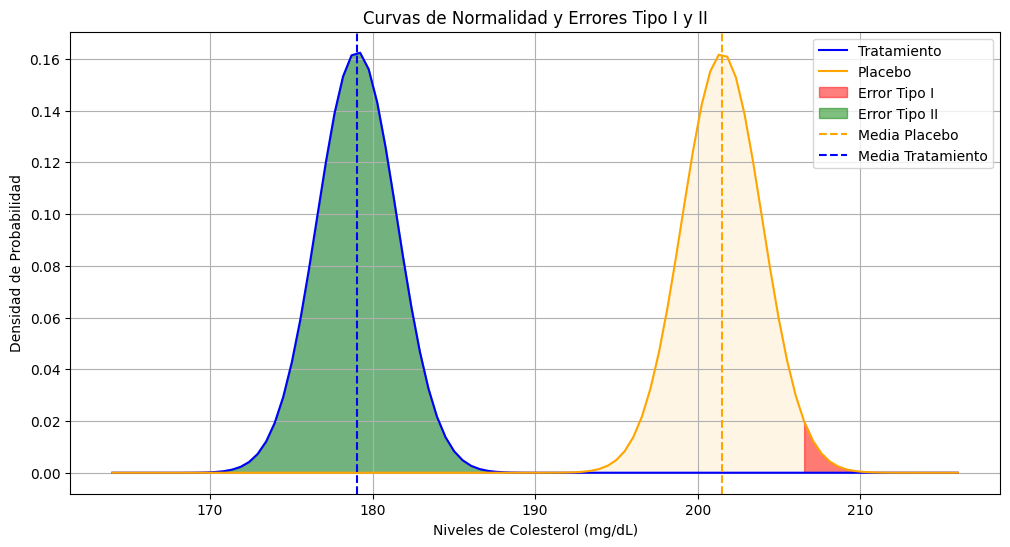

In [13]:
# prompt: Genera los dos gráficos anteriores en un solo gráfico, muestra los errores tipo I y II sombreados en otro color

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

xmin = min(min(tratamiento), min(placebo)) - 10
xmax = max(max(tratamiento), max(placebo)) + 10
x = np.linspace(xmin, xmax, 100)

# Distribuciones de los grupos
mean_tratamiento, std_tratamiento = np.mean(tratamiento), np.std(tratamiento)
mean_placebo, std_placebo = np.mean(placebo), np.std(placebo)

# Curvas de densidad normal
pdf_tratamiento = stats.norm.pdf(x, mean_tratamiento, std_tratamiento)
pdf_placebo = stats.norm.pdf(x, mean_placebo, std_placebo)

# Paso 3: Gráfico
plt.figure(figsize=(12, 6))

# Curvas de normalidad
plt.plot(x, pdf_tratamiento, label='Tratamiento', color='blue')
plt.fill_between(x, pdf_tratamiento, alpha=0.1, color='blue')
plt.plot(x, pdf_placebo, label='Placebo', color='orange')
plt.fill_between(x, pdf_placebo, alpha=0.1, color='orange')

# Errores Tipo I y II
alpha = 0.05  # Nivel de significancia

# Cálculo para el error tipo I (área bajo la curva del test de hipótesis)
critical_value = stats.norm.ppf(1 - alpha / 2, loc=mean_placebo, scale=std_placebo)
plt.fill_between(x, pdf_placebo, where=(x > critical_value), color='red', alpha=0.5, label='Error Tipo I')

# Cálculo para el error tipo II (área bajo la curva del test de hipótesis)
# Para este ejemplo, vamos a considerar un valor de h0 que esté por encima de la media de tratamiento
h0_mean = mean_placebo
beta = stats.norm.cdf(critical_value, loc=mean_tratamiento, scale=std_tratamiento)
plt.fill_between(x, pdf_tratamiento, where=(x < h0_mean) & (x > xmin), color='green', alpha=0.5, label='Error Tipo II')

# Etiquetas y leyenda
plt.title('Curvas de Normalidad y Errores Tipo I y II')
plt.xlabel('Niveles de Colesterol (mg/dL)')
plt.ylabel('Densidad de Probabilidad')
plt.axvline(mean_placebo, color='orange', linestyle='--', label='Media Placebo')
plt.axvline(mean_tratamiento, color='blue', linestyle='--', label='Media Tratamiento')
plt.legend()
plt.grid()
plt.show()

Parece evidente a simple vista que la reducción en el grupo tratamiento existe.

Pongo un ejemplo donde la desviación típica es mucho mayor, pasamos de 5 a 15, vemos que las curvas se superponen.

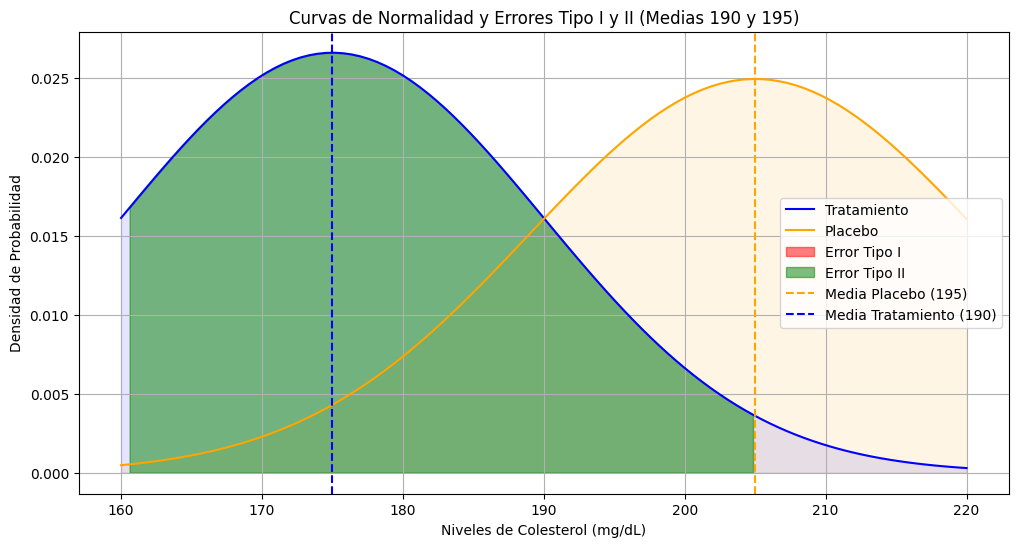

In [17]:
# Paso 1: Definir los parámetros para las nuevas muestras
mean_tratamiento = 175
std_tratamiento = 15
mean_placebo = 205
std_placebo = 16

# Generar un rango de valores para las curvas de normalidad
xmin = 160  # Valor mínimo ajustado
xmax = 220  # Valor máximo ajustado
x = np.linspace(xmin, xmax, 100)

# Curvas de densidad normal para tratamiento y placebo
pdf_tratamiento = stats.norm.pdf(x, mean_tratamiento, std_tratamiento)
pdf_placebo = stats.norm.pdf(x, mean_placebo, std_placebo)

# Paso 2: Gráfico
plt.figure(figsize=(12, 6))

# Curvas de normalidad
plt.plot(x, pdf_tratamiento, label='Tratamiento', color='blue')
plt.fill_between(x, pdf_tratamiento, alpha=0.1, color='blue')
plt.plot(x, pdf_placebo, label='Placebo', color='orange')
plt.fill_between(x, pdf_placebo, alpha=0.1, color='orange')

# Errores Tipo I y II
alpha = 0.05  # Nivel de significancia

# Cálculo del error tipo I (área bajo la curva del test de hipótesis)
critical_value = stats.norm.ppf(1 - alpha, loc=mean_placebo, scale=std_placebo)
plt.fill_between(x, pdf_placebo, where=(x > critical_value), color='red', alpha=0.5, label='Error Tipo I')

# Para el error tipo II (área bajo la curva de Tratamiento que corresponde a la media del placebo)
plt.fill_between(x, pdf_tratamiento, where=(x < mean_placebo) & (x > xmin), color='green', alpha=0.5, label='Error Tipo II')

# Etiquetas y leyenda
plt.title('Curvas de Normalidad y Errores Tipo I y II (Medias 190 y 195)')
plt.xlabel('Niveles de Colesterol (mg/dL)')
plt.ylabel('Densidad de Probabilidad')
plt.axvline(mean_placebo, color='orange', linestyle='--', label='Media Placebo (195)')
plt.axvline(mean_tratamiento, color='blue', linestyle='--', label='Media Tratamiento (190)')
plt.legend()
plt.grid()
plt.show()

# Comprobar la homogeneaidad de las muestras

In [19]:
# Paso 3: Comprobar homogeneidad de varianzas (Test de Levene)
levene_stat, levene_p_value = stats.levene(tratamiento, placebo)

print("Test de Levene:")
print(f"Estadística: {levene_stat:.4f}, Valor p: {levene_p_value:.4f}")

# Paso 4: Comparar las medias usando el test de Welch
welch_t_stat, welch_p_value = stats.ttest_ind(tratamiento, placebo, equal_var=False)

print("Test de Welch:")
print(f"Estadística t: {welch_t_stat:.4f}, Valor p: {welch_p_value:.4f}")

# Paso 5: Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if levene_p_value < alpha:
    print("Las varianzas son diferentes (rechazar H0 en Levene).")
else:
    print("Las varianzas son homogéneas (no rechazar H0 en Levene).")

if welch_p_value < alpha:
    print("Hay una diferencia significativa entre los grupos (rechazar H0 en Welch).")
else:
    print("No hay diferencia significativa entre los grupos (no rechazar H0 en Welch).")

Test de Levene:
Estadística: 0.0463, Valor p: 0.8300
Test de Welch:
Estadística t: -45.2943, Valor p: 0.0000
Las varianzas son homogéneas (no rechazar H0 en Levene).
Hay una diferencia significativa entre los grupos (rechazar H0 en Welch).


# Explicación

**Test de Levene**\

**Propósito**: Se utiliza para comprobar la homogeneidad de varianzas entre dos o más grupos. Esto significa que se evalúa si las varianzas de los grupos son iguales o significativamente diferentes.

**Cuándo usarlo:**

- Antes de realizar pruebas de comparación de medias (como la ANOVA o la prueba t de Student) para verificar si la suposición de homogeneidad de varianzas se sostiene.

- Cuando se están comparando dos o más grupos.
- Es útil en situaciones donde los datos pueden no seguir una distribución normal, ya que el test de Levene es menos sensible a la normalidad. Pero en este caso, tampoco se podría usar t-Student.

**Ventajas:**

- Puede usarse incluso si las distribuciones no son normales.
- Es robusto frente a violaciones de la normalidad.

**Test de Welch**

**Propósito**: Se utiliza para realizar comparaciones de medias entre dos grupos cuando las varianzas son desiguales y/o cuando el tamaño de las muestras son diferentes. Es una alternativa a la prueba t de Student, pero no requiere la suposición de homogeneidad de varianzas.

**Cuándo usarlo:**\
- Cuando los grupos que se están comparando tienen varianzas significativamente diferentes, independientemente de si son iguales o no.
- En análisis comparativos donde se sospecha que las varianzas no son homogéneas, especialmente si se han detectado diferencias en el test de Levene.

**Ventajas:**

- Más potente que la prueba t de Student estándar cuando las varianzas no son homogéneas.
- No requiere el supuesto de homogeneidad de varianzas.

**Paso a paso de la aplicación:**

- Comprobar la normalidad: Realizar pruebas o analizar los gráficos de los datos de colesterol en ambos grupos para asegurarse de que los datos se distribuyen normalmente.
- Verificar la independencia: Asegurarse de que las asignaciones a grupos (tratamiento y placebo) se realizaron de forma aleatoria.
- Evaluar la homogeneidad de varianzas: Llevar a cabo una prueba de homogeneidad de varianzas para confirmar que las varianzas son similares entre los dos grupos.

## Nuestro ejemplo

Existe homogeneidad de la muestra, puesto que

Test de Levene:
Estadística: 0.0463, Valor p: 0.8300

como p > 0.05 podemos usar t- student.

# Cálculo T Student

Para calcular la t de Student en los dos ejemplos (el primero con los datos originales y el segundo con las nuevas medias y desviaciones estándar), podemos seguir el proceso de comparación de medias utilizando la prueba t para muestras independientes. La fórmula general para calcular la estadística t en este contexto es:

$$
t = \frac{\bar{X_1} - \bar{X_2}}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}
$$

Donde:

$\bar{X_1}$ y $\bar{X_2}$ son las medias de los dos grupos (tratamiento y placebo).\
$s_1$ y $s_2$ son las desviaciones estándar de los dos grupos.\
$n_1$ y $n_2$ son los tamaños de las muestras.\

**Ejemplo 1: Datos Originales**

Supongamos que la media y desviación estándar en el primer ejemplo fueron:

Tratamiento:

Media $\bar{X_1} = 179.1 $(calculada a partir de los datos iniciales).\
Desviación estándar $s_1$ = 2.65 (esto se puede calcular a partir de la muestra original).

Tamaño de muestra $n_1 = 50$.\
Placebo:

Media $\bar{X_2}$ = 201.\
Desviación estándar $s_2 = 2.97$ (esto se puede calcular a partir de la muestra original).

Tamaño de muestra $n_2 = 50$.

In [22]:
# Datos del primer ejemplo
mean_tratamiento_1 = 179.1  # Media del tratamiento
std_tratamiento_1 = 2.65     # Desviación estándar del tratamiento
n1 = 50                       # Tamaño de la muestra del tratamiento

mean_placebo_1 = 201         # Media del placebo
std_placebo_1 = 2.97         # Desviación estándar del placebo
n2 = 50                       # Tamaño de la muestra del placebo

# Cálculo de t
t_1 = (mean_tratamiento_1 - mean_placebo_1) / np.sqrt((std_tratamiento_1**2 / n1) + (std_placebo_1**2 / n2))
t_1

# Grados de libertad para la prueba t
df_1 = n1 + n2 - 2

# Cálculo del p-value para la prueba t de dos colas
p_value_1 = (1 - stats.t.cdf(np.abs(t_1), df=df_1)) * 2  # Multiplicamos por 2 para el test de dos colas

# Resultados para el primer ejemplo
print("Ejemplo 1:")
print(f"Estadística t: {t_1:.4f}")
print(f"Valor p: {p_value_1:.4f}")

# Interpretación del p-value
alpha = 0.05  # Nivel de significancia
if p_value_1 < alpha:
    print("Rechazamos la hipótesis nula: hay evidencia suficiente para sugerir que hay una diferencia significativa entre los grupos.")
else:
    print("No rechazamos la hipótesis nula: no hay suficiente evidencia para sugerir una diferencia significativa entre los grupos.")

Ejemplo 1:
Estadística t: -38.9050
Valor p: 0.0000
Rechazamos la hipótesis nula: hay evidencia suficiente para sugerir que hay una diferencia significativa entre los grupos.


### Pongamos el ejemplo donde aumentamos la desviación típica

In [23]:
# Ejemplo 2: Nuevas Medias y Desviaciones Estándar
# Datos del primer grupo
mean_tratamiento_2 = 190     # Media del tratamiento
std_tratamiento_2 = 15       # Desviación estándar del tratamiento
n1_2 = 50                     # Tamaño de la muestra del tratamiento

# Datos del segundo grupo
mean_placebo_2 = 195         # Media del placebo
std_placebo_2 = 16           # Desviación estándar del placebo
n2_2 = 50                     # Tamaño de la muestra del placebo

# Cálculo de t para el segundo ejemplo
t_2 = (mean_tratamiento_2 - mean_placebo_2) / np.sqrt((std_tratamiento_2**2 / n1_2) + (std_placebo_2**2 / n2_2))

# Grados de libertad
df_2 = n1_2 + n2_2 - 2

# Cálculo del p-value para el test de dos colas
p_value_2 = (1 - stats.t.cdf(np.abs(t_2), df=df_2)) * 2

# Resultados para el segundo ejemplo
print("\nEjemplo 2:")
print(f"Estadística t: {t_2:.4f}")
print(f"Valor p: {p_value_2:.4f}")

# Interpretación del p-value
if p_value_2 < alpha:
    print("Rechazamos la hipótesis nula: hay evidencia suficiente para sugerir que hay una diferencia significativa entre los grupos.")
else:
    print("No rechazamos la hipótesis nula: no hay suficiente evidencia para sugerir una diferencia significativa entre los grupos.")


Ejemplo 2:
Estadística t: -1.6121
Valor p: 0.1102
No rechazamos la hipótesis nula: no hay suficiente evidencia para sugerir una diferencia significativa entre los grupos.


## Ejecutamos los mismos ejemplos con código python y librerías estadísticas

In [33]:
# prompt: Con los vectores tratamiento y placebo realiza un test t-student e ilustra en un gráfico las curvas de normalidad para explicar el resultado


# Example 1: Original Data using scipy.stats.ttest_ind
t_statistic_1, p_value_1 = stats.ttest_ind(tratamiento, placebo, equal_var=True) # Assuming equal variance based on Levene's test

print("\nExample 1 (using scipy.stats.ttest_ind):")
print(f"t-statistic: {t_statistic_1:.4f}")
print(f"p-value: {p_value_1:.4f}")

if p_value_1 < alpha:
    print("Rechace la hipótesis nula: hay evidencia suficiente para sugerir una diferencia significativa entre los grupos")
else:
    print("No se puede rechazar la hipótesis nula: no hay evidencia suficiente para sugerir una diferencia significativa entre los grupos.")


# Example 2: Se incrementa la desviación tipo de ambos grupos
# Crearemos nuevas matrices con desviaciones estándar modificadas y luego realizaremos la prueba t.
# Simulo los datos con las desviaciones estándar y las medias dadas.
np.random.seed(0) # para ejecutar con los mismos datos
tratamiento2 = np.random.normal(loc=mean_tratamiento_2, scale=std_tratamiento_2, size=n1_2)
placebo2 = np.random.normal(loc=mean_placebo_2, scale=std_placebo_2, size=n2_2)

t_statistic_2, p_value_2 = stats.ttest_ind(tratamiento2, placebo2, equal_var=False) # Prueba t de Welch ya que las varianzas son diferentes

print("\nExample 2 (using scipy.stats.ttest_ind with simulated data):")
print(f"t-statistic: {t_statistic_2:.4f}")
print(f"p-value: {p_value_2:.4f}")

if p_value_2 < alpha:
    print("Rechace la hipótesis nula: hay evidencia suficiente para sugerir una diferencia significativa entre los grupos")
else:
    print("No se puede rechazar la hipótesis nula: no hay evidencia suficiente para sugerir una diferencia significativa entre los grupos.")

t_statistic_2, p_value_2 = stats.ttest_ind(tratamiento2, placebo2, equal_var=True) # Prueba t de Student ya que las varianzas son similares

print("\nExample 2 (using scipy.stats.ttest_ind with simulated data):")
print(f"t-statistic: {t_statistic_2:.4f}")
print(f"p-value: {p_value_2:.4f}")

if p_value_2 < alpha:
    print("Rechace la hipótesis nula: hay evidencia suficiente para sugerir una diferencia significativa entre los grupos")
else:
    print("No se puede rechazar la hipótesis nula: no hay evidencia suficiente para sugerir una diferencia significativa entre los grupos.")


Example 1 (using scipy.stats.ttest_ind):
t-statistic: -45.2943
p-value: 0.0000
Rechace la hipótesis nula: hay evidencia suficiente para sugerir una diferencia significativa entre los grupos

Example 2 (using scipy.stats.ttest_ind with simulated data):
t-statistic: -0.8190
p-value: 0.4149
No se puede rechazar la hipótesis nula: no hay evidencia suficiente para sugerir una diferencia significativa entre los grupos.

Example 2 (using scipy.stats.ttest_ind with simulated data):
t-statistic: -0.8190
p-value: 0.4148
No se puede rechazar la hipótesis nula: no hay evidencia suficiente para sugerir una diferencia significativa entre los grupos.


# Explicación de los errores tipo I ($\alpha$) y tipo II ($β$)

Los errores tipo I (α) y tipo II (β) son conceptos fundamentales en la estadística, especialmente en el contexto de pruebas de hipótesis. A continuación se presenta una explicación detallada de estos conceptos, junto con su relación con el gráfico siguiente.

**1. Pruebas de Hipótesis**\
En estadística, una prueba de hipótesis es un procedimiento que permite tomar decisiones sobre la población basándose en muestras. La hipótesis se formula en dos partes:

- Hipótesis nula  $H_0$ : Es la afirmación que se pone a prueba. Generalmente, representa un estado de "no efecto" o "no diferencia". Por ejemplo, podría decir que no hay diferencia en los niveles de colesterol entre dos tratamientos.

- Hipótesis alternativa $H_a $: Es la afirmación que se acepta si se rechaza la hipótesis nula. Representa la presencia de un efecto o una diferencia.

###Error Tipo I (α)
**Definición**: Un error tipo I ocurre cuando se rechaza la hipótesis nula $H_0$ cuando en realidad es verdadera. En otras palabras, es la "falsa alarma". Este error implica que se concluye erróneamente que hay un efecto o una diferencia cuando no existe.

**Probabilidad de Error Tipo I**: La probabilidad de cometer un error tipo I se denota como ( α ) . Este valor se especifica antes de realizar la prueba y comúnmente se establece en niveles como 0.05, 0.01, etc. Esto significa que se acepta un 5% o 1% de riesgo de concluir que un efecto existe cuando en realidad no.

**Ejemplo en el Gráfico: **

En el gráfico, el área roja representa el error tipo I. Esto es el área bajo la curva del grupo placebo que está a la derecha del valor crítico. Si el valor observado cae en esta área, se rechazará la hipótesis nula, concluyendo que hay una diferencia significativa entre tratamientos, incluso si en realidad no la hay.

### Error Tipo II (β)
**Definición**: Un error tipo II ocurre cuando no se rechaza la hipótesis nula $ H_0 $ cuando en realidad es falsa. Esto significa que se concluye incorrectamente que no hay un efecto o una diferencia cuando sí existe. Este es un Error de "no ver" o "no detectar".

**Probabilidad de Error Tipo II:** La probabilidad de cometer un error tipo II se denota como ( β ). A diferencia de ( α ), el valor de ( β ) no se establece directamente antes de la prueba, ya que depende de varios factores, como el tamaño de la muestra, la magnitud del efecto real y la variabilidad.

**Ejemplo en el Gráfico:** En el gráfico, el área verde representa el error tipo II. Es el área bajo la curva del tratamiento que está a la izquierda del valor crítico. Si un valor observado cae en esta área, la hipótesis nula no se rechazará, lo que significa que no se detectará una diferencia significativa entre los tratamientos, a pesar de que en realidad hay una diferencia.

### Potencia del Test
**Definición:** La potencia de una prueba estadística es la probabilidad de rechazar correctamente la hipótesis nula cuando es falsa. Se denomina ( 1 - β ).

**Relación con los Errores:** Aumentar la potencia implica disminuir el riesgo de cometer un error tipo II. Esto se puede lograr:
- aumentando el tamaño de la muestra,
- aumentando el tamaño del efecto o
- reduciendo la variabilidad de los datos.

Ejemplo en el Gráfico: El área azul representa el poder de la prueba (1 - β), es decir, la probabilidad de detectar correctamente una diferencia significativa entre los tratamientos cuando realmente existe.

### Resumen
- Error Tipo I (α): Rechazar $ H_0 $ cuando es verdadera; se representan en rojo en el gráfico.
- Error Tipo II (β): No rechazar $ H_0 $ cuando es falsa; se representan en verde en el gráfico.
- Potencia: ( 1 - β ); representa la capacidad del test de detectar un efecto verdadero; se representa en azul en el gráfico.

Estos conceptos son esenciales para la interpretación de resultados en estudios estadísticos y experimentales, y son fundamentales para diseñar experimentos que sean efectivos y confiables.

## Genero una función para ejecutar el gráfico

In [41]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

def comparar_grupos(mean_tratamiento, std_tratamiento, mean_placebo, std_placebo):
    """
    Compara dos grupos con sus medias y desviaciones estándar, mostrando un gráfico con las áreas de error.

    Args:
        mean_tratamiento: Media del grupo de tratamiento.
        std_tratamiento: Desviación estándar del grupo de tratamiento.
        mean_placebo: Media del grupo placebo.
        std_placebo: Desviación estándar del grupo placebo.
    """

    xmin = min(mean_tratamiento - 3 * std_tratamiento, mean_placebo - 3 * std_placebo)
    xmax = max(mean_tratamiento + 3 * std_tratamiento, mean_placebo + 3 * std_placebo)
    x = np.linspace(xmin, xmax, 1000)

    pdf_tratamiento = stats.norm.pdf(x, mean_tratamiento, std_tratamiento)
    pdf_placebo = stats.norm.pdf(x, mean_placebo, std_placebo)

    alpha = 0.05
    critical_value = stats.norm.ppf(1 - alpha, loc=mean_placebo, scale=std_placebo)

    plt.figure(figsize=(12, 6))
    plt.plot(x, pdf_tratamiento, label=f'Tratamiento (mean={mean_tratamiento}, std={std_tratamiento})', color='blue')
    plt.plot(x, pdf_placebo, label=f'Placebo (mean={mean_placebo}, std={std_placebo})', color='orange')

    x_fill_alpha = np.linspace(critical_value, xmax, 1000)
    pdf_fill_alpha = stats.norm.pdf(x_fill_alpha, mean_placebo, std_placebo)
    plt.fill_between(x_fill_alpha, pdf_fill_alpha, color='red', alpha=0.5, label='Error Tipo I (α)')

    x_fill_beta = np.linspace(xmin, critical_value, 1000)
    pdf_fill_beta = stats.norm.pdf(x_fill_beta, mean_tratamiento, std_tratamiento)
    plt.fill_between(x_fill_beta, pdf_fill_beta, color='green', alpha=0.5, label='Error Tipo II (β)')

    x_fill_power = np.linspace(critical_value, xmax, 1000)
    pdf_fill_power = stats.norm.pdf(x_fill_power, mean_tratamiento, std_tratamiento)
    plt.fill_between(x_fill_power, pdf_fill_power, color='blue', alpha=0.3, label='Poder de la Muestra (1 - β)')

    plt.axvline(mean_tratamiento, color='blue', linestyle='--', label=f'Media Tratamiento ({mean_tratamiento})')
    plt.axvline(mean_placebo, color='orange', linestyle='--', label=f'Media Placebo ({mean_placebo})')

    plt.title('Comparación de Curvas Normales y Áreas de Errores')
    plt.xlabel('Valores')
    plt.ylabel('Densidad de Probabilidad')
    plt.legend()
    plt.grid()
    plt.show()

### Ejecuto el gráfico

Para poder probar distintos supuestos y visualizar los errores tipo I y II debemos poner:

comparar_grupos(media grupo 1, desviación tipo grupo 1, media grupo 2, desviación tipo grupo 2)

Más elegante podríamos poner

comparar_grupos($\mu_1, \sigma_1, \mu_2, \sigma_2)$

Dibujamos las gráficas del Ejemplo 1, donde se evidencias las diferencias.

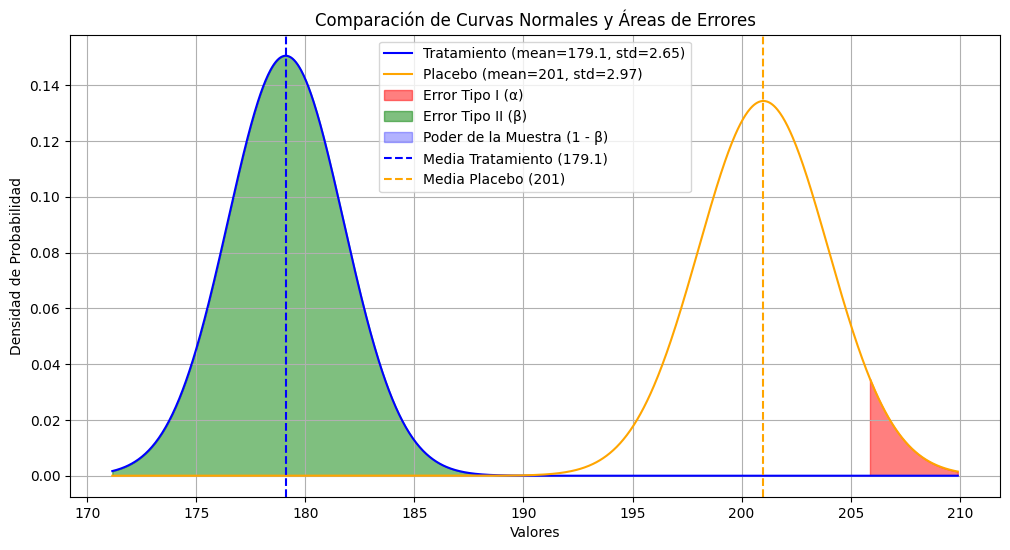

In [43]:
comparar_grupos(179.1,2.65,201,2.97)

Ahora dibujamos un ejemplo donde el test sale negativo, comparar las áreas de los errores Tipo I y II.

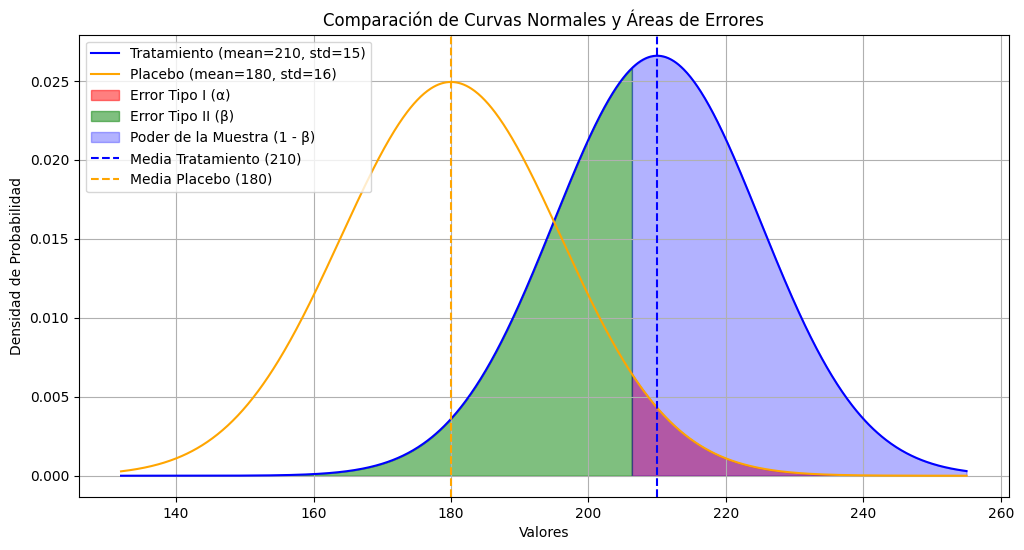

In [42]:
comparar_grupos(210,15,180,16)